# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [149]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

plt.style.use('ggplot')

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [150]:
print data.describe()

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

In PCA, the first principle component will have the highest variance in the data. Based on this we could say the first component would be Fresh. We find future components the same way but constrained to be orthogonal to preceding components. Thus it would be difficult to predict what the 2nd principle component might be.

I think it's fair to assume the the features in the data are independent of eachother. For example, it's unlikely the amount of Milk purchased is a function of Grocery, etc. Based on this I'd think the vectors for ICA will be largely independent of eachother.

### PCA

In [151]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(data)
print pca

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

PCA(copy=True, n_components=6, whiten=False)
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


([<matplotlib.axis.XTick at 0x116ead250>,
 <a list of 7 Text xticklabel objects>)

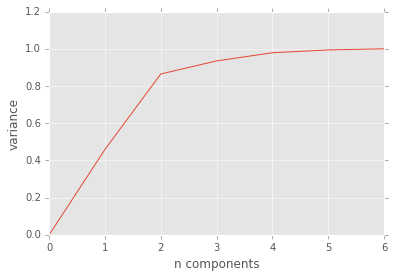

In [152]:
y = [0.0] + list(np.cumsum(pca.explained_variance_ratio_))
x = range(len(pca.explained_variance_ratio_)+1)
plt.figure(1)
plt.plot(x, y, '-')
plt.xlabel('n components')
plt.ylabel('variance')
plt.xticks(x)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The first 2 components supply ~86.5% of the variance, after this the variance drops rougly by the same amount per dimension except the last since at that point we've already covered 99% of the variance in the first 5.

Based on the above I would choose 3 dimensions for my analysis, at this point we have 93.48% data preservation. We also have 3 dimensions which could still be useful for visualizations. One could also make the case for 2 dimensions since this would allow for simpler 2D plots.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

The result from PCA are orthogonal vectors representing a basis set. We require all these vectors to fully express the vector space. The idea of PCA is to create a basis set such that we can preserve the data variance with the fewest possible vectors. This explains the drop off in variance explanation; PCA concentrates the variance in the first few components.

As we can see the more vectors we use the more variance we maintain up until 100% using all the vectors. Using the first 2 basis vectors we have 86.5% variance, first 3 93.48%, etc.

### ICA

In [153]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6, random_state=42)
X = data - data.mean(axis=0) # cleaner if we do this step now
X /= X.std(axis=0)
S = ica.fit_transform(X)
A = ica.mixing_
W = ica.components_ # inverse of A
n = ica.mean_

# Print the independent components
print W # unmixing matrix
print A

[[-0.01092072 -0.00108702  0.00731609  0.05411747 -0.00254425 -0.01677584]
 [ 0.00254077 -0.01234233  0.06920747  0.00142537 -0.01376418 -0.00544717]
 [-0.00491164 -0.00154072 -0.00562786 -0.00252788  0.00238715  0.05098745]
 [-0.00336665  0.01865122  0.1091143  -0.00724067 -0.13353828 -0.01604104]
 [-0.05032368  0.0064794   0.00749098  0.00322781 -0.01148445  0.00271098]
 [-0.00194074 -0.07253711  0.05654051  0.0016755  -0.01715991  0.01697522]]
[[  1.64890301   0.45801413   2.79143065   1.93145766 -20.54984073
   -1.50092445]
 [  0.59402871  11.92899206   6.95935334   0.87383738   0.34181061
  -15.71729153]
 [ -0.58000358  20.31885809   2.67561999  -1.642622     1.14800737
   -3.82524923]
 [ 19.17881893  -1.02157739   6.77284012   0.35747993  -4.87533671
   -0.60101669]
 [ -1.60924891  18.10241199   0.23264984  -8.83225109   2.02999475
   -5.15066346]
 [  1.13896796   1.74915279  20.7120878    0.46239058  -2.17928232
   -0.83039699]]


In [154]:
print np.allclose(X, np.dot(S, A.T) + n) # back to original data, X = S * A.T + n
print np.allclose(S, np.dot(X - n, W.T)) # inverse, S = (X-n) * W.T

True
True


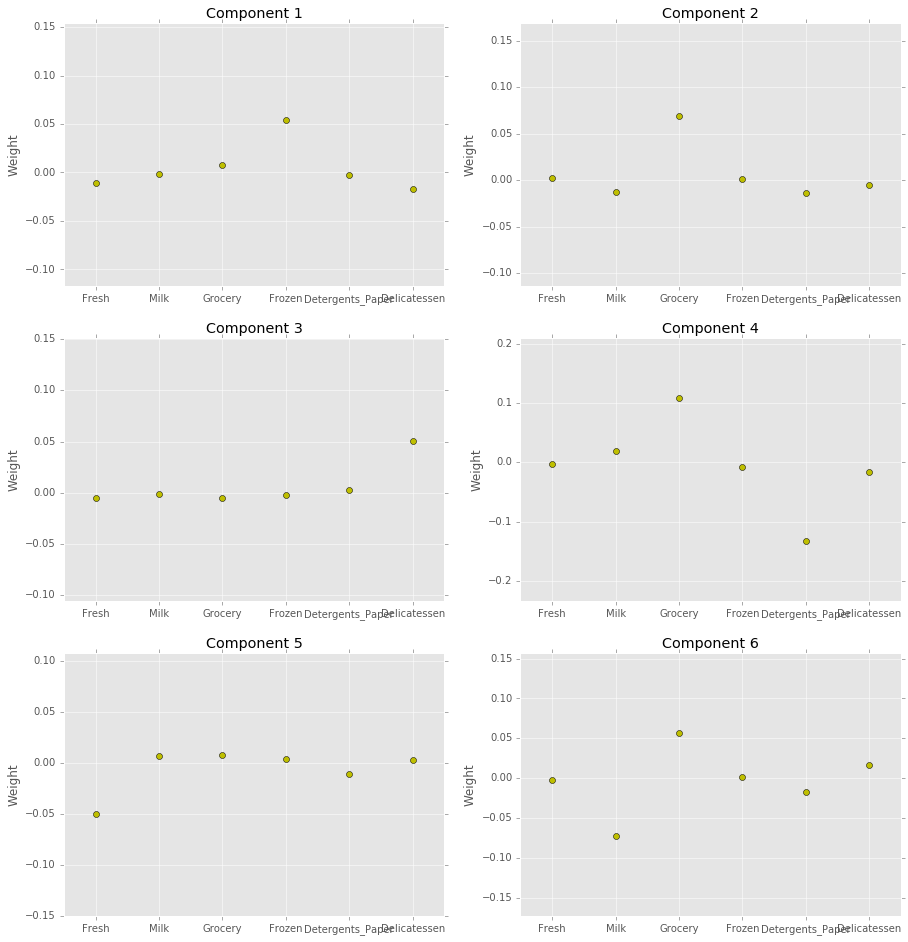

In [155]:
# plot all ICA components
plt.figure(1, figsize=(15,16))
for i, component in enumerate(W):
    # 6 components 3 row, 2 cols
    plot_n = int('32' + str(i+1))
    plt.subplot(plot_n)
    plt.xticks(range(6), list(data.columns))
    # pads on axis
    plt.xlim(-0.5, 5.5)
    plt.ylim(min(component)-0.1, max(component)+0.1)
    plt.title('Component {}'.format(i+1))
    plt.ylabel('Weight')
    plt.plot(component, 'yo')

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

Component 1

- Frozen weight heavily
- (+ weight) Grocery, Frozen
- (- weight) Fresh, Milk, Detergents_Paper, Delicatessen

Component 2

- Grocery weighted heavily
- (+) Fresh, Grocery, Frozen
- (-) Milk, Detergents_Paper, Delicatessen

Component 3

- Delicatessen weighted heavily
- (+) Detergents_Paper, Delicatessen
- (-) Fresh, Milk, Grocery, Frozen

Component 4

- Grocery and Detergents_Paper weighted heavily
- (+) Milk, Grocery
- (-) Fresh, Frozen, Detergents_Paper, Delicatessen

Component 5

- Fresh weighted heavily
- (+) Milk, Grocery, Frozen, Delicatessen
- (-) Fresh, Detergents_Paper

Component 6

- Milk and Grocery weighted heavily
- (+) Grocery, Frozen, Delicatessen
- (-) Milk, Fresh, Detergents_Paper

The components represent rows of the weight matrix, we multiply this weight matrix with the original data to retrieve the original individual signals. The weights represent how much we care about a particular category.

It's interesting to note every category has a component which favours its signal. As such we could expect leaving out a component would alter the reconstruction of one category more than others.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

Advantages of K Means

* Conceptually it's quite simple, also intuitive
* KMeans scales well with large datasets and medium sized dimensions
* Distance function can be varied
* General purpose, works at least reasonably well with most datasets

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [156]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [157]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [158]:
def kmeans(data, **kwargs):
    return KMeans(**kwargs).fit(data)

kmeans6 = kmeans(reduced_data, n_clusters=6)
kmeans5 = kmeans(reduced_data, n_clusters=5)
kmeans4 = kmeans(reduced_data, n_clusters=4)
kmeans3 = kmeans(reduced_data, n_clusters=3)
print kmeans6

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [159]:
def build_mesh_grid(clusters):
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    centroids = clusters.cluster_centers_
    print 'Cluster centers: \n', centroids
    return Z, centroids

In [160]:
Z6, centroids6 = build_mesh_grid(kmeans6)
Z5, centroids5 = build_mesh_grid(kmeans5)
Z4, centroids4 = build_mesh_grid(kmeans4)
Z3, centroids3 = build_mesh_grid(kmeans3)

Cluster centers: 
[[  6035.6523743   -5702.59417982]
 [-37704.64157991  -5488.35405895]
 [-20964.64986166  68819.21772923]
 [ -9351.85448379  -4667.83404401]
 [  2787.06628956  24275.2601508 ]
 [  7177.17913696   6446.09370654]]
Cluster centers: 
[[  6399.7117556   -4169.29690862]
 [-37704.64157991  -5488.35405895]
 [  5607.91709853  14199.18040025]
 [-14537.71774395  61715.67085248]
 [ -9052.39957144  -4808.55909102]]
Cluster centers: 
[[  3542.08605212  -4936.7212132 ]
 [  5710.98964991  12661.45687292]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]]
Cluster centers: 
[[  1341.31124554  25261.39189714]
 [  4165.1217824   -3105.15811456]
 [-23978.86566553  -4445.56611772]]


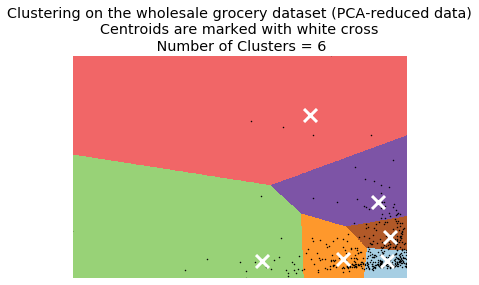

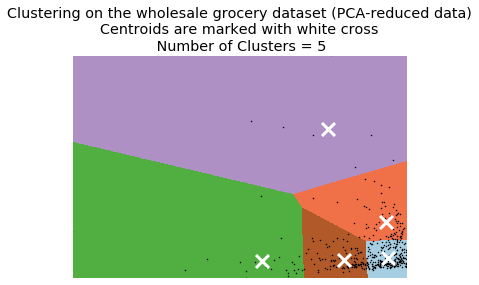

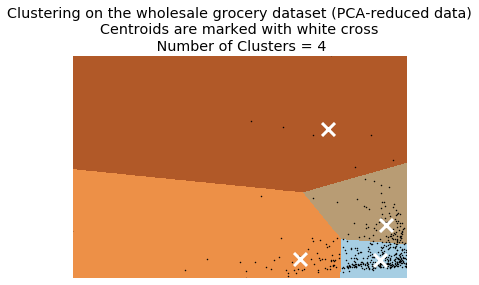

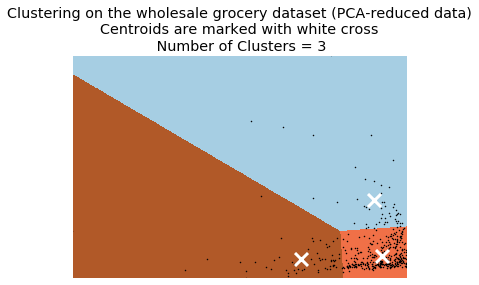

In [161]:
# Put the result into a color plot

def cluster_plot(Z, centroids):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross\n Number of Clusters = {}'.format(len(centroids)))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

cluster_plot(Z6, centroids6)
cluster_plot(Z5, centroids5)
cluster_plot(Z4, centroids4)
cluster_plot(Z3, centroids3)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

The vast majority of the data is focused in the bottom right of the graphic. The interesting thing is though you could make cases for each of the n_cluster assignments.

If we view the points as customers we can see most customers have similar purchase patterns.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

In [148]:
data.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

Answer: 

From the K-Means visualization we can see distinct clusters, which could represent types of customers. We could also see there is a trend in general to the lower right corner, perhaps suggesting there are cross cluster commonalities. 

In more detail, the data forms an L shape. This might imply many customers have 1 common purchase category but afterwards disperse into the different categories. As we can see above most purchases fall into the Fresh category followed by Grocery and Milk, so this hypothesis seems plausible.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

We could design an experiment to see if lower purchasing of some categories (ex. Delicatessen) is due to lack of demand or if it's just bad pricing.

We can do this by creating incentives for customers who buy Fresh + Milk/Grocery. For example, discounts on lower bought categories. We can run this in an A/B test format and see how much the purchases increase for the lower bought categories.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

We could use the results from our A/B test to classify customers based on whether we think they will purchase more lower bought categories products or not. We could do this with a supervised learning technique like logistic regression. With this approach, we could target new customers appropriately with a discount if it will increase purchases adequately. Conversvely, if the model predicts a discount will not alter the customers purchasing behaviours, we will not offer them a discount since it would simply lose us money.